# Multiclass Classification - LR

- Iris Dataset

## Step 1: Import necessary libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

## Step 2: Load the dataset

In [237]:
data = pd.read_csv("iris.csv")

## Step 3: Exploratory Data Analysis (EDA)

In [238]:
# Display the first few rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [239]:
# Summary statistics of the features
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [240]:
# Count of each class
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species   
4.9           3.1          1.5           0.1          setosa        3
5.8           2.7          5.1           1.9          virginica     2
              4.0          1.2           0.2          setosa        1
5.9           3.0          4.2           1.5          versicolor    1
6.2           3.4          5.4           2.3          virginica     1
                                                                   ..
5.5           2.3          4.0           1.3          versicolor    1
              2.4          3.7           1.0          versicolor    1
                           3.8           1.1          versicolor    1
              2.5          4.0           1.3          versicolor    1
7.9           3.8          6.4           2.0          virginica     1
Length: 147, dtype: int64

In [241]:
# Check for missing values
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [242]:
# Check for duplicate rows
print(data.duplicated().sum())

3


In [243]:
# Drop duplicate rows
print(data.drop_duplicates())

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[147 rows x 5 columns]


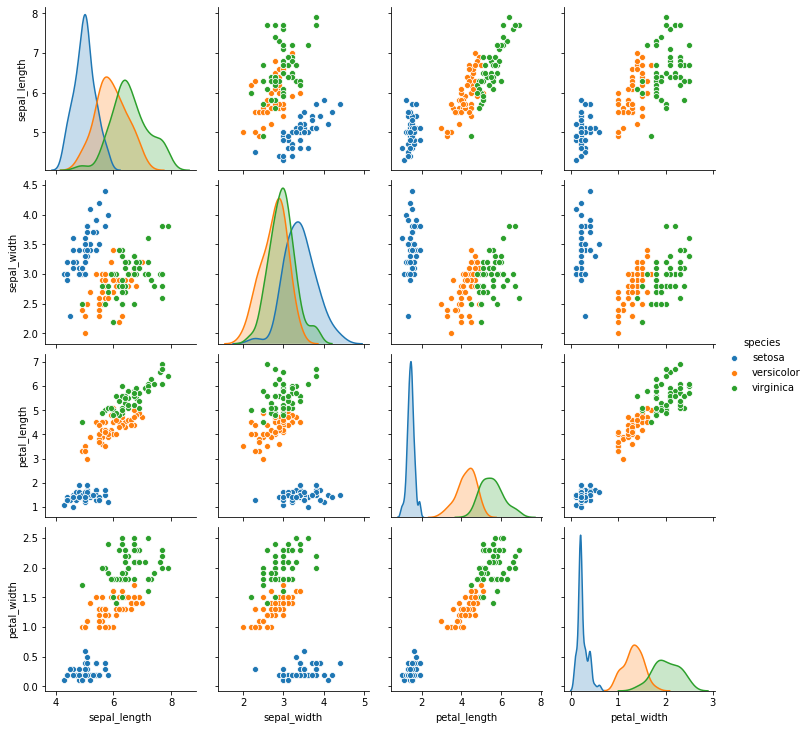

In [244]:
# Visualizations
# Pairplot to visualize relationships between features
sns.pairplot(data, hue="species")
plt.show(sns)

## Step 4: Data Preprocessing

In [245]:
# Split the dataset into features (X) and target labels (y)
X = data.drop("species", axis=1)
y = data["species"]

In [246]:
# Encode the target variable into numeric labels
y_encoded = pd.factorize(y)[0]

In [247]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Training

In [249]:
# Create and train a logistic regression model
model = LogisticRegression(penalty='l2', dual=False, fit_intercept=True, random_state=None, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 6: Model Evaluation


In [250]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [251]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [252]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Step 7: Visualization 

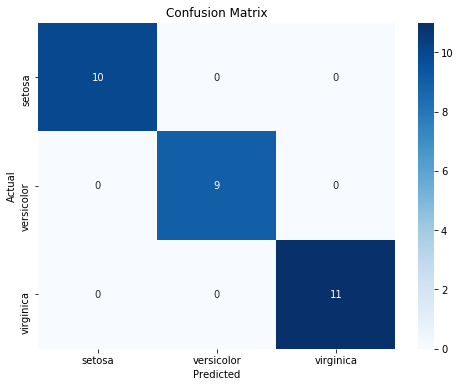

In [253]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=data["species"].unique(),
            yticklabels=data["species"].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 8: ROC and AUC Visualization

In [254]:
# Binarize the labels for ROC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

In [255]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

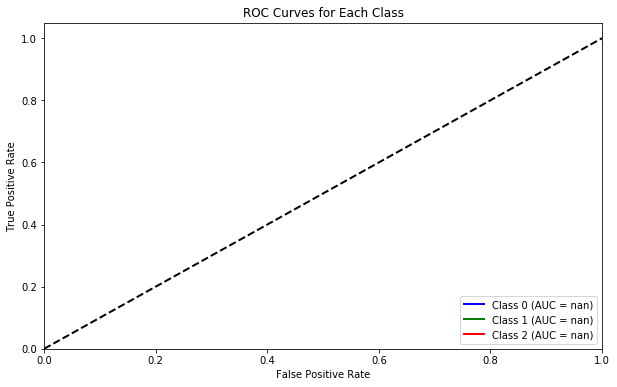

In [256]:
# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()